In [15]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [16]:
%ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is 5CA2-A60B

 Directory of C:\Users\raviteja\Desktop\MSBAPM\Pricing Analytics\nikitha files\ALL_DATA\ALL_DATA

05/09/2016  02:34 PM    <DIR>          .
05/09/2016  02:34 PM    <DIR>          ..
05/01/2016  04:36 PM    <DIR>          .ipynb_checkpoints
05/01/2016  02:43 PM            22,473 23_new.xlsx
05/01/2016  02:25 PM            34,937 23_new_o.xlsx
04/21/2016  04:33 PM            56,411 export.xlsx
05/05/2016  03:12 PM           455,758 scatter.html
04/27/2016  07:27 PM            48,574 type_22_All.xlsx
04/27/2016  08:39 PM            41,058 type_23_All.xlsx
04/30/2016  10:46 AM            63,025 type_24_all.xlsx
04/27/2016  08:40 PM            44,441 type_25_All.xlsx
04/27/2016  08:41 PM            67,476 type_26_All.xlsx
04/27/2016  08:42 PM            19,318 type_27_All.xlsx
04/27/2016  08:43 PM            11,982 type_28_All.xlsx
04/27/2016  08:44 PM            12,234 type_29_All.xlsx
04/27/2016  08:46 PM            54,5

In [17]:
type22=pd.read_excel('type_22_All.xlsx')

In [18]:
type22.ADDIPRICE22.value_counts()

2.9900    534
4.9900    307
3.9900     27
1.9900     16
5.9900     15
3.4900      1
3.3900      1
3.2757      1
3.6566      1
3.2400      1
4.3233      1
4.4900      1
Name: ADDIPRICE22, dtype: int64

In [19]:
type22=type22[(type22['ADDIPRICE22']!=3.4900) & (type22['ADDIPRICE22']!=3.3900) & (type22['ADDIPRICE22']!=3.2757) & (type22['ADDIPRICE22']!=3.6566) 
& (type22['ADDIPRICE22']!=3.2400) & (type22['ADDIPRICE22']!=4.3233) & (type22['ADDIPRICE22']!=4.4900)]

In [20]:
type22.ADDIPRICE22.value_counts()

2.99    534
4.99    307
3.99     27
1.99     16
5.99     15
Name: ADDIPRICE22, dtype: int64

In [21]:
#type22['ADDIPRICE22_2']=type22['ADDIPRICE22']*type22['ADDIPRICE22']

In [22]:
#type22['AVGGASTRANS_2']=type22['AVGGASTRANS']*type22['AVGGASTRANS']

In [23]:
X=type22.drop(['SITE','AVGGASPRICE',u'AVGADDIDEMAND'],axis=1)
y=np.log(type22.AVGADDIDEMAND)
#y=1/type22.AVGADDIDEMAND

In [24]:
X[u'AVGGASTRANS']=np.log(X[u'AVGGASTRANS'])

In [25]:
#X[u'AVGGASTRANS']=np.log(X[u'AVGGASTRANS_2'])

In [26]:
#X['AVGGASPRICE']=1/(X['AVGGASPRICE'])

In [27]:
X=sm.add_constant(X)

In [28]:
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          AVGADDIDEMAND   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     805.5
Date:                Sun, 22 May 2016   Prob (F-statistic):          6.56e-201
Time:                        10:11:44   Log-Likelihood:                -58.202
No. Observations:                 899   AIC:                             122.4
Df Residuals:                     896   BIC:                             136.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -2.2437      0.113    -19.915      0.000        -2.465    -2.023
ADDIPRICE22    -0.1982      0.009    -22.675      0.000        -0.215    -0.181
AVGGASTRANS     0.6834      0.019     36.780      0.000         0.647     0.720
==============================================================================
Omnibus:                       64.704   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.716
Skew:                           0.481   Prob(JB):                     3.71e-27
Kurtosis:                       4.525   Cond. No.                         96.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x1=np.linspace(1,10,10)
y1=x1.copy()
#y1=-0.5330283*x1

from bokeh.charts import output_file
from bokeh.plotting import figure, output_notebook, show
p = figure(plot_width=500, plot_height=500)
p.ygrid[0].ticker.desired_num_ticks = 15
p.xgrid[0].ticker.desired_num_ticks = 15
p.scatter(np.exp(y), np.exp(sm.OLS(y,X).fit().predict(X)), size=4, color="navy", alpha=0.5)
p.line(x1, y1, color="red", alpha=0.5)
p.xaxis.axis_label = "Actual Demand"
p.yaxis.axis_label = "Predicted Demand"
#p.title="ACTUAL vs PREDICTED"
output_file("scatter.html")
show(p)
#print popt[0],popt[1]

In [151]:

x1=np.linspace(-1,3,10)
y1=np.linspace(0,0,10)
#y1=-0.5330283*x1

from bokeh.charts import output_file
from bokeh.plotting import figure, output_notebook, show
p = figure(plot_width=500, plot_height=500)
p.ygrid[0].ticker.desired_num_ticks = 15
p.xgrid[0].ticker.desired_num_ticks = 15
p.scatter(sm.OLS(y,X).fit().predict(X),y-sm.OLS(y,X).fit().predict(X), size=4, color="navy", alpha=0.5)
p.line(x1, y1, color="red", alpha=0.5)
p.xaxis.axis_label = "Predicted"
p.yaxis.axis_label = "Residuals"
#p.title="ACTUAL vs PREDICTED"
output_file("scatter.html")
show(p)
#print popt[0],popt[1]

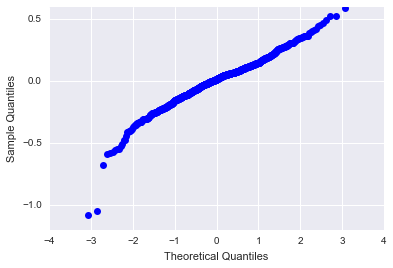

In [98]:
res = sm.OLS(y,X).fit().resid # residuals
fig = sm.qqplot(res)
plt.show()

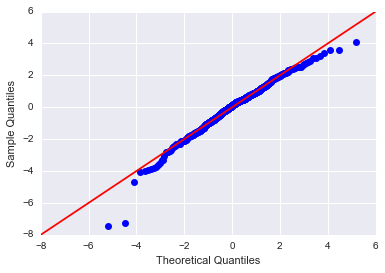

In [99]:
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()

In [170]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [171]:
rmse(sm.OLS(y,X).fit().predict(X),y)

0.25958046937289925